#### For this week’s mini-assignment, use Austen’s corpus and tokenize the string in Jupyter. Then choose which works you want to search for. Show a table of the top 20 words. Experiment a bit by adding and removing words from your stopword list. Then analyze the tokens for collocation. Analyze how often a pair of words appears in the same sentence (word collocates with phrases). Try this with both, voyant and jupyter, and reflect on your results.

Instead of Austen's corpus I used a Korpus of Kafa's works (all texts I could find on gutenberg.org), compiled them and got rid of the "paratexts" and everything else that is not necessary. 

First, I'm going to import everything I need, list my files (to see what I have and if it's in the right directory) and count the total characters of my corpus. 

In [304]:
import nltk
import glob
import re
import os

In [305]:
textfiles = glob.glob("kafka/*txt") # list files in local directory  
textfiles

['kafka/betrachtung.txt',
 'kafka/heizer.txt',
 'kafka/hunger.txt',
 'kafka/laerm.txt',
 'kafka/Landarzt.txt',
 'kafka/mord.txt',
 'kafka/strafkolonie.txt',
 'kafka/urteil.txt',
 'kafka/verwandlung.txt']

In [306]:
textList=[]
for textFile in textfiles: # create a list 
    f = open(textFile, "r")
    textList = textList + [f.read().upper()]
    f.close()
len(textList)

9

In [307]:
kafkaString=""
for text in textList:
    kafkaString = kafkaString +"\n"+text
len(kafkaString)

427145

In [308]:
totalCharacters = 0
textString=""
len(textString)
for textFile in textfiles:
    f = open(textFile, "r")
    currentstring=f.read()
    textString = textString + currentstring
    f.close()
    chars = len(currentstring)
    print(textFile, "has", chars, "characters") # show each file name with the number of characters
    totalCharacters += chars 
    print("total characters currently: ", totalCharacters)
print("total characters: ", totalCharacters)

kafka/betrachtung.txt has 37277 characters
total characters currently:  37277
kafka/heizer.txt has 64506 characters
total characters currently:  101783
kafka/hunger.txt has 22839 characters
total characters currently:  124622
kafka/laerm.txt has 1293 characters
total characters currently:  125915
kafka/Landarzt.txt has 83985 characters
total characters currently:  209900
kafka/mord.txt has 4132 characters
total characters currently:  214032
kafka/strafkolonie.txt has 65456 characters
total characters currently:  279488
kafka/urteil.txt has 25093 characters
total characters currently:  304581
kafka/verwandlung.txt has 121288 characters
total characters currently:  425869
total characters:  425869


#### Then, as proposed in my mini assignment, I show a table of the top 20 words in Kafka's corpus. 

In [309]:
# simple lowercase tokenize
kafkaTokensLowercase = nltk.word_tokenize(kafkaString.lower())

# filter out tokens that aren't words
kafkaWordTokensLowercase = [word for word in kafkaTokensLowercase if word[0].isalpha()]

# determine frequencies
kafkaWordTokensLowercaseFreqs = nltk.FreqDist(kafkaWordTokensLowercase)

# preview the top 20 frequencies
kafkaWordTokensLowercaseFreqs.tabulate(20)

  der   und   die    er    zu   sie   den    in nicht  sich   ich    es   das   mit   dem  aber   war   auf   ein  dass 
 1861  1860  1829  1314   989   967   911   901   889   878   829   790   744   704   602   596   586   534   505   421 


#### I was curious what we are going to learn next and plotted some of my results (also, plotting is so much fun!)

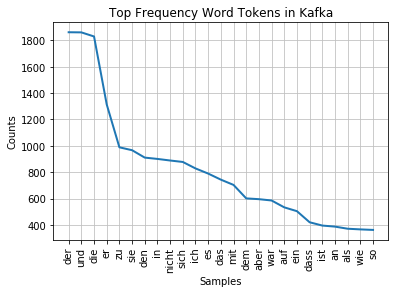

In [310]:
%matplotlib inline

# plot the top frequency words of Kafka's corpus in a graph
kafkaWordTokensLowercaseFreqs.plot(25, title="Top Frequency Word Tokens in Kafka")

#### That's interesting. Let's try again by filtering out the stopwords. 

In [311]:
stopwords = nltk.corpus.stopwords.words("german")

In [354]:
kafkaRealContentWordTokensLowercase = [word for word in kafkaWordTokensLowercase \
        if word[0].isalpha() and word not in stopwords]
kafkaRealContentWordFrequencies = nltk.FreqDist(kafkaRealContentWordTokensLowercase)
kafkaRealContentWordFrequencies.tabulate(20) # show a sample of the top 20

     schon      sagte     gregor      vater      immer         ja       mehr       ganz        sah       karl     mutter  schwester vielleicht        gar     zimmer   offizier       zeit        tür       hand   reisende 
       261        231        218        152        140        140        134        132        121        117        113        113        109         96         96         93         87         85         80         79 


### I'm going to add "hätte", "dass" and "konnte" to the stopwords list

In [389]:
stopwords = nltk.corpus.stopwords.words("german")

In [390]:
stopwords.append("hätte")
stopwords.append("konnte")
stopwords.append("dass")
stopwords.append("gregor")
stopwords.remove("nicht")
stopwords.append("karl")
stopwords.append("mutter")
stopwords.append("schwester")

In [391]:
kafkaRealContentWordTokensLowercase = [word for word in kafkaWordTokensLowercase \
        if word[0].isalpha() and word not in stopwords]
kafkaRealContentWordFrequencies = nltk.FreqDist(kafkaRealContentWordTokensLowercase)
kafkaRealContentWordFrequencies.tabulate(20) # show a sample of the top 20

     nicht      schon      sagte      vater      immer         ja       mehr       ganz        sah vielleicht        gar     zimmer   offizier       zeit        tür       hand   reisende       kopf       wohl       fast 
       889        261        231        152        140        140        134        132        121        109         96         96         93         87         85         80         79         77         75         75 


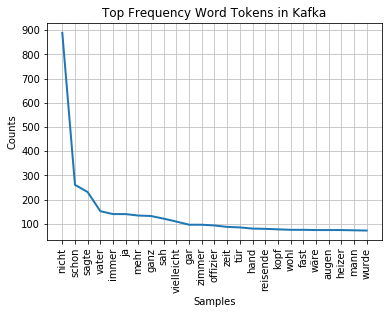

In [392]:
%matplotlib inline

# plot the top frequency words in a graph
kafkaRealContentWordFrequencies.plot(25, title="Top Frequency Word Tokens in Kafka")

#### As a German native speaker it seems interesting to me, that he uses the word "nicht" ("not") so often. Based on this, one could conclude that Kafka makes a very high use of negations, but of course, to be sure, we would need to compare this result with other corpora. The word adverb "gar" is mostly used in colloquial speech with a negation ("gar nicht", "not at all"). It is definitly used more often in "older" works, such as works from the 18th and 19th century, so probably it's just a matter of the time period. Once again, one has to compare the results with corpora from the same time period.  

### I noticed that there are 893 occurences of "nicht" in voyant, so I'm going to use regular expression to specify my results

In [400]:
nichtList=re.findall("[^A-Z]NICHT[^A-Z]",kafkaString,)
len(nichtList)

893

In [401]:
garList=re.findall("[^A-Z]GAR[^A-Z]",kafkaString,)
len(garList)

96

### Here I tried the same with the "most common" function of the nltk, which gives a better overview

In [397]:
kafkaContentWordTokensLowercase = [word for word in kafkaWordTokensLowercase if word not in stopwords]
kafkaContentWordTokensLowercaseFreqs = nltk.FreqDist(kafkaContentWordTokensLowercase)
kafkaContentWordTokensLowercaseFreqs.most_common(20)

[('nicht', 889),
 ('schon', 261),
 ('sagte', 231),
 ('vater', 152),
 ('immer', 140),
 ('ja', 140),
 ('mehr', 134),
 ('ganz', 132),
 ('sah', 121),
 ('vielleicht', 109),
 ('gar', 96),
 ('zimmer', 96),
 ('offizier', 93),
 ('zeit', 87),
 ('tür', 85),
 ('hand', 80),
 ('reisende', 79),
 ('kopf', 77),
 ('wohl', 75),
 ('fast', 75)]

### Next, I want to take a look at the concordances of the words "gar" and "nicht"

In [398]:
kafkaText = nltk.Text(nltk.word_tokenize(kafkaString))
kafkaText.concordance("gar", lines=5)
kafkaText.concordance("nicht", lines=5)

Displaying 5 of 96 matches:
 GRABEN FALLEN . UND DAMIT WOLLTE MAN GAR NICHT AUFHÖREN . WIE MAN SICH IM LETZ
H MIT . UND DOCH KANN ICH DIESE LAUNE GAR NICHT BENÜTZEN UND KANN NUR NACH HAUS
RECHT VORBRINGEN KÖNNTE . ICH KANN ES GAR NICHT VERTEIDIGEN , DASS ICH AUF DIES
U UNS ; DIE BESTEN FREUNDE ABER HABEN GAR NICHT AUF UNSER PFERD GESETZT , DA SI
 LEICHTHIN KLOPFEN . ENDLICH FÄNGT ES GAR AUS DEM TRÜB GEWORDENEN HIMMEL ZU REG
Displaying 5 of 889 matches:
NER ELTERN . VOR DEM GITTER HÖRTE ES NICHT AUF . KINDER IM LAUFSCHRITT WAREN IM
E IN EINEM ATEMZUG STIEGEN , BIS ICH NICHT MEHR GLAUBTE , DASS SIE STIEGEN , SO
 , UND AUCH IHM WAR AN EINER ANTWORT NICHT VIEL GELEGEN . SPRANG DANN EINER ÜBE
GERADE DU , BLEIB ZU HAUSE , WENN DU NICHT MITWILLST. « -- » KEINE GNADEN ! « -
T IHR UNS HERUNTERWERFET , FÄLLT UNS NICHT EIN , SO GESCHEIT SIND WIR NOCH. « -


### And here I'm looking for the most frequent collocations

In [399]:
kafkaText.collocations()

DER REISENDE; DER OFFIZIER; DIE SCHWESTER; MIT DEM; EIN WENIG; DER
VATER; GAR NICHT; SAGTE DER; AUF DEM; NICHT MEHR; DIE MUTTER; AUS DEM;
DER VERURTEILTE; DEN KOPF; MIT EINEM; AUF DEN; ICH HABE; DIE TÜR; HERR
SAMSA; WENN MAN
